## 1. Import Libraries & Load Dataset
We will load the Titanic dataset from seaborn and preview the first rows.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset from seaborn
df = sns.load_dataset("titanic")

# Preview dataset
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. Check for Missing Values
Let’s inspect missing values to decide how to handle them.


In [2]:
# Check missing values
df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 3. Handle Missing Values
- Fill `age` with **median**
- Fill `embarked` and `embark_town` with **mode**
- Drop `deck` (too many missing values)


In [6]:
# Handle missing values safely
df['age'] = df['age'].fillna(df['age'].median())

if 'embarked' in df.columns:
    df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

if 'embark_town' in df.columns:
    df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# Drop deck only if it exists
df = df.drop(columns=['deck'], errors='ignore')

# Verify again
df.isnull().sum()


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## 4. Convert Categorical Columns to Numeric
- Convert `sex` → male=0, female=1
- Convert `class` → First=1, Second=2, Third=3


In [7]:
# Convert categorical columns to numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['class'] = df['class'].map({'First': 1, 'Second': 2, 'Third': 3})

# Check conversion
df[['sex', 'class']].head()


,sex,class
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


## 5. Plot Survival Rate by Gender
We use a barplot to show how survival rate differs between males and females.


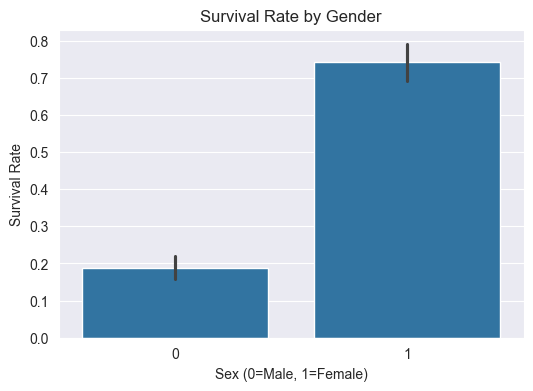

In [8]:
plt.figure(figsize=(6,4))
sns.barplot(x="sex", y="survived", data=df)
plt.title("Survival Rate by Gender")
plt.xlabel("Sex (0=Male, 1=Female)")
plt.ylabel("Survival Rate")
plt.show()


## 6. Plot Survival Rate by Passenger Class
We use a barplot to visualize survival rate across 1st, 2nd, and 3rd class.


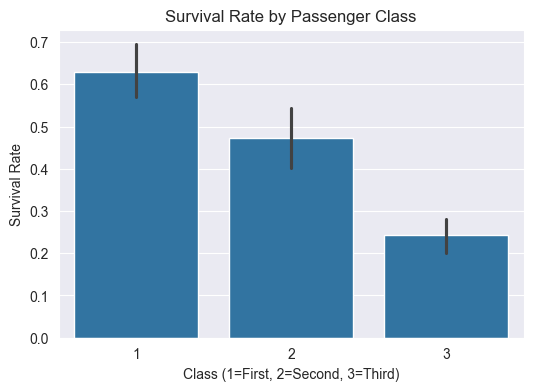

In [9]:
plt.figure(figsize=(6,4))
sns.barplot(x="class", y="survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Class (1=First, 2=Second, 3=Third)")
plt.ylabel("Survival Rate")
plt.show()
